<a href="https://colab.research.google.com/github/lsm4446/study_python/blob/master/Google_Colab_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 야후로부터 특정 주식 가져오기

---
이런저런 이야기 


In [0]:
print("hello")
print("wow")

hello
wow


## 하나 아래

In [0]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2016, 2, 19)  # 월은 02가 아니라 2로 입력
end = datetime.datetime(2016, 3, 4)
web.DataReader("078930.KS", "yahoo", start, end)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2417 entries, 2010-01-04 to 2020-02-14
Data columns (total 6 columns):
High         2417 non-null float64
Low          2417 non-null float64
Open         2417 non-null float64
Close        2417 non-null float64
Volume       2417 non-null float64
Adj Close    2417 non-null float64
dtypes: float64(6)
memory usage: 132.2 KB


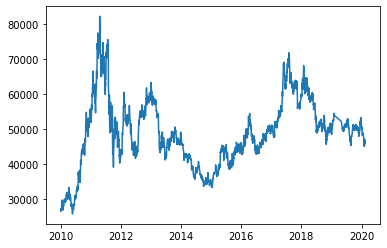

In [0]:
# df로 가져온 주식 정보를 이용하여 차트 그리기
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt

gs = web.DataReader("078930.KS", "yahoo")  # 시작과 종료를 입력하지 않으면, 2010/1/1부터 오늘까지 자료를 가져온다.
gs.info()

plt.plot(gs.index, gs['Adj Close'])  # gs.index를 통해 x축이 날짜로 출력된다.
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2417 entries, 2010-01-04 to 2020-02-14
Data columns (total 6 columns):
High         2417 non-null float64
Low          2417 non-null float64
Open         2417 non-null float64
Close        2417 non-null float64
Volume       2417 non-null float64
Adj Close    2417 non-null float64
dtypes: float64(6)
memory usage: 132.2 KB


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


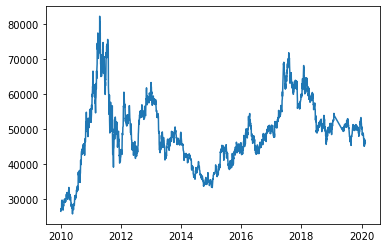

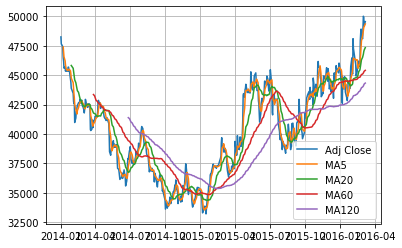

In [0]:


# %%


# %%
# 주가이동평균 계산
import pandas as pd
import pandas_datareader.data as web

gs = web.DataReader("078930.KS", "yahoo", "2014-01-01", "2016-03-06")  # datetime을 사용하지 않고 직접 날짜를 입력할 경우 02월이나 2월이나 상관 없다.
gs.tail(10)

ma5 = gs['Adj Close'].rolling(window=5).mean()  # 5일 주가 이동평균
type(ma5)
ma5.tail(10)  # 뒤에서부터 10개만 확인

# new_gs = gs[gs['Volume'] !=0]
# 3.1절과 같이 공휴일로 주식시장이 열리지 않는 경우 데이터에서 제거하기 위해 거래량이 0인 항목을 제거(그런데 앞의 데이터를 보면, 제거하지 않아도 애초에 없어서 문제가 없는듯?)

ma5 = gs['Adj Close'].rolling(window=5).mean()
gs.insert(len(gs.columns), "MA5", ma5)  # MA5를 기존 gs DataFrame에 추가
gs.tail(5)

ma20 = gs['Adj Close'].rolling(window=20).mean()
ma60 = gs['Adj Close'].rolling(window=60).mean()
ma120 = gs['Adj Close'].rolling(window=120).mean()
gs.insert(len(gs.columns), "MA20", ma20)
gs.insert(len(gs.columns), "MA60", ma60)
gs.insert(len(gs.columns), "MA120", ma120)

# %%
# 주가이동평균 그리기
import matplotlib.pyplot as plt

plt.plot(gs.index, gs['Adj Close'], label="Adj Close")
plt.plot(gs.index, gs['MA5'], label="MA5")  # 하나의 테이블에 각각의 그래프가 겹쳐져서 그려진다.
plt.plot(gs.index, gs['MA20'], label="MA20")
plt.plot(gs.index, gs['MA60'], label="MA60")
plt.plot(gs.index, gs['MA120'], label="MA120")
plt.legend(loc='best')  # 범례를 표시하기 위한 legend 함수
plt.grid()  # 테이블에 격자선 추가
